In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [409]:
df = pd.read_csv("survey_results.csv")

In [410]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


****Finding Duplicates:****

In [411]:
df.duplicated().sum()

10

In [412]:
df = df.drop_duplicates(keep='first')

In [413]:
df.duplicated().sum()

0

As the duplicates were so less. Dropped those duplicates.

****Using Boxplot lets find outliers from Age column****

In [414]:
df["age"].describe()

count    30000.000000
mean        33.048167
std         13.438904
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max        604.000000
Name: age, dtype: float64

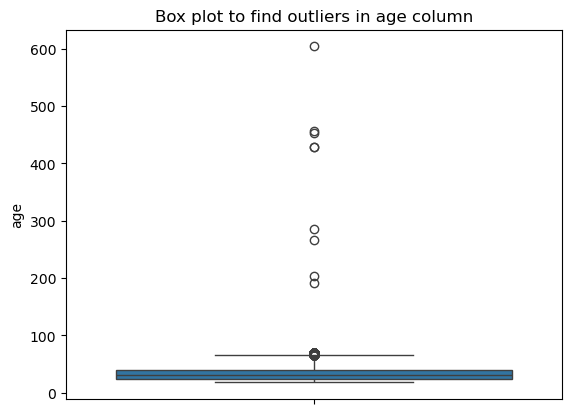

In [415]:
sns.boxplot(df["age"])
plt.title("Box plot to find outliers in age column")
plt.show()

From the above box plot we can see some outliers for the column age. We can handle it by giving a maximum value, let's take it 100 and replace any value greater than 100 with 100 to handle outlier.

In [416]:
df[df["age"]>100]["age"].count()

9

In [417]:
df.loc[df["age"] > 100, "age"] = 100
df[df["age"]>100]["age"].count()

0

Taken 100 as maximum value for human age, any values above 100 is replaced with 100.

****Let's find Missing Data and Misspelled Data in Categorical Columns****

*****Income Level Column*****

In [418]:
df["income_levels"].unique()

array(['<10L', '> 35L', '16L - 25L', nan, '10L - 15L', '26L - 35L'],
      dtype=object)

In [419]:
df.loc[df["income_levels"].isna(), "income_levels"] = "Not Reported"
df["income_levels"].unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

*****Consume Frequency (Eeekly)*****

In [420]:
df[df["consume_frequency(weekly)"].isna()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
879,R00880,48,F,Urban,Entrepreneur,26L - 35L,NaN,Newcomer,Medium (500 ml),above 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Casual (eg. At home),200-250
4174,R04173,23,M,Urban,Student,Not Reported,NaN,Newcomer,Medium (500 ml),above 4,Price,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
9550,R09546,19,M,Urban,Student,Not Reported,NaN,Established,Medium (500 ml),0 to 1,Price,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),50-100
15352,R15347,25,M,Metro,Student,Not Reported,NaN,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),100-150
19719,R19713,27,M,Urban,Working Professional,16L - 25L,NaN,Newcomer,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
26143,R26134,19,M,Metro,Student,Not Reported,NaN,Newcomer,Medium (500 ml),2 to 4,Price,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
26859,R26850,25,M,Metro,Working Professional,16L - 25L,NaN,Established,Medium (500 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),200-250
27163,R27154,21,M,Metro,Student,Not Reported,NaN,Established,Small (250 ml),2 to 4,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Casual (eg. At home),50-100


In [421]:
df["consume_frequency(weekly)"].mode()

0    3-4 times
Name: consume_frequency(weekly), dtype: object

In [747]:
df["consume_frequency(weekly)"].unique()

array(['3-4 times', '5-7 times', '0-2 times'], dtype=object)

In [422]:
df.loc[df["consume_frequency(weekly)"].isna(), "consume_frequency(weekly)"] = "3-4 times"
df["consume_frequency(weekly)"].isna().sum()

0

*****Purchase Channel*****

In [423]:
df["purchase_channel"].unique()

array(['Online', 'Retail Store', nan], dtype=object)

In [424]:
df["purchase_channel"].isna().sum()

10

In [425]:
df.loc[df["purchase_channel"].isna(), "purchase_channel"] = "Online"
df["purchase_channel"].unique()

array(['Online', 'Retail Store'], dtype=object)

*****Zone*****

In [426]:
df["zone"].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [427]:
df.loc[df["zone"] == "Metor", "zone"] = "Metro"
df[df["zone"]=="Metor"]["zone"].count()

0

In [428]:
df.loc[df["zone"] == "urbna", "zone"] = "Urban"
df[df["zone"]=="urbna"]["zone"].count()

0

In [429]:
df["zone"].mode()

0    Metro
Name: zone, dtype: object

In [748]:
df["zone"].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

*****Also checking Other Columns:*****

In [430]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

In [431]:
df["occupation"].unique()

array(['Working Professional', 'Student', 'Entrepreneur', 'Retired'],
      dtype=object)

In [432]:
df["current_brand"].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [433]:
df.loc[df["current_brand"]=="Establishd", "current_brand"] = "Established"
df.loc[df["current_brand"]=="newcomer", "current_brand"] = "Newcomer"
df["current_brand"].unique()

array(['Newcomer', 'Established'], dtype=object)

In [434]:
df["preferable_consumption_size"].unique()

array(['Medium (500 ml)', 'Large (1 L)', 'Small (250 ml)'], dtype=object)

In [435]:
df["awareness_of_other_brands"].unique()

array(['0 to 1', '2 to 4', 'above 4'], dtype=object)

In [436]:
df["reasons_for_choosing_brands"].unique()

array(['Price', 'Quality', 'Availability', 'Brand Reputation'],
      dtype=object)

In [437]:
df["flavor_preference"].unique()

array(['Traditional', 'Exotic'], dtype=object)

In [438]:
df["packaging_preference"].unique()

array(['Simple', 'Premium', 'Eco-Friendly'], dtype=object)

In [439]:
df["typical_consumption_situations"].unique()

array(['Active (eg. Sports, gym)', 'Social (eg. Parties)',
       'Casual (eg. At home)'], dtype=object)

In [440]:
df["health_concerns"].unique()

array(['Medium (Moderately health-conscious)', 'Low (Not very concerned)',
       'High (Very health-conscious)'], dtype=object)

In [441]:
df["price_range"].unique()

array(['100-150', '200-250', '150-200', '50-100'], dtype=object)

In [442]:
df["respondent_id"].count()

30000

*****Creating Age Groups:*****

In [443]:
df["age"].unique()

array([ 30,  46,  41,  33,  23,  22,  45,  31,  27,  49,  44,  19,  24,
        32,  56,  54,  37,  63,  52,  40,  35,  21,  34,  26,  18,  20,
        25,  39,  53,  28,  59,  36,  50,  29,  43,  42,  38,  70,  51,
        68,  48,  62,  60,  65,  47,  67,  64,  55,  66,  57,  61,  69,
        58, 100])

In [444]:
bins = [17, 25, 35, 45, 55, 70, 110]
labels = ['18-25', '26-35', '36-45', '46-55', '56-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df = df.drop(columns = "age") 
df["age_group"].describe()

count     30000
unique        6
top       18-25
freq      10468
Name: age_group, dtype: object

*****Creating Consume Frequency and Awareness Brand Score:*****

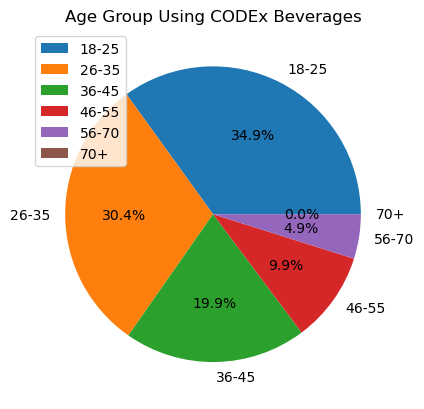

In [808]:
plt.pie(df["age_group"].value_counts(), autopct='%1.1f%%', labels=df["age_group"].value_counts().index)
plt.title("Age Group Using CODEx Beverages")
plt.legend()
plt.show()

In [445]:
df["consume_frequency(weekly)_score"] = df["consume_frequency(weekly)"].map({
  "0-2 times" : 1,
  "3-4 times" : 2,
  "5-7 times" : 3  
})

df["awareness_of_other_brands_score"] = df["awareness_of_other_brands"].map({
    "0 to 1" : 1,
    "2 to 4" : 2,
    "above 4" : 3
})

In [446]:
df["consume_frequency(weekly)_score"].unique() , df["awareness_of_other_brands_score"].unique()

(array([2, 3, 1]), array([1, 2, 3]))

In [447]:
df["cf_ab_score"] =  df["consume_frequency(weekly)_score"]/ (df["consume_frequency(weekly)_score"] + df["awareness_of_other_brands_score"])
df["cf_ab_score"] = round(df["cf_ab_score"] ,2)

*****Create Zone Affluence Score:*****

In [448]:
df["zone_score"] = df["zone"].map({
    "Urban" : 3,
    "Metro" : 4,
    "Semi-Urban" : 2,
    "Rural" : 1
})

df["income_score"] = df["income_levels"].map({
     "<10L" : 1,
     "10L - 15L" : 2,
     "16L - 25L" : 3,
     "26L - 35L" : 4,
     "> 35L" : 5,
     "Not Reported" : 0
})

In [449]:
df["zac_score"] = df["zone_score"]* df["income_score"]

*****Calculating BSI:*****

In [450]:
def calculate_bsi(row):
    if row['current_brand'] != " " and row['reasons_for_choosing_brands'] in ['Price', 'Quality']:
        return 1
    else:
        return 0

In [451]:
df['bsi'] = df.apply(calculate_bsi, axis=1)

*****Removing Logical Outliers::*****

In [452]:
pd.crosstab(df['age_group'], df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106
70+,1,1,1,6


In [453]:
#Removing logical outliers where high age group having occupation as student which is not possible
df = df[~((df["age_group"] == "56-70") & (df["occupation"] == "Student"))]

In [454]:
#I have age_group above 70+ only to maintain same consistensy with the qc questions as those questions didn't have 70+ age_group
df = df[~(df["age_group"] == "70+")]

In [458]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'consume_frequency(weekly)_score', 'awareness_of_other_brands_score',
       'cf_ab_score', 'zone_score', 'income_score', 'zac_score', 'bsi'],
      dtype='object')

*****Other Feature Engineering:*****

In [460]:
df = df.drop(columns = "respondent_id")

In [650]:
df["age_group_encoded"] = LabelEncoder().fit_transform(df["age_group"])
df["income_levels_encoded"] = LabelEncoder().fit_transform(df["income_levels"])
df["health_concerns_encoded"] = LabelEncoder().fit_transform(df["health_concerns"])
df["consume_frequency(weekly)_encoded"] = LabelEncoder().fit_transform(df["consume_frequency(weekly)"])
df["preferable_consumption_size_encoded"] = LabelEncoder().fit_transform(df["preferable_consumption_size"])

In [785]:
df["preferable_consumption_size"].unique()

array(['Medium (500 ml)', 'Large (1 L)', 'Small (250 ml)'], dtype=object)

In [784]:
df["preferable_consumption_size_encoded"].unique()

array([1, 0, 2])

In [651]:
df.head(2)

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,...,cf_ab_score,zone_score,income_score,zac_score,bsi,age_group_encoded,income_levels_encoded,health_concerns_encoded,consume_frequency(weekly)_encoded,preferable_consumption_size_encoded
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,...,0.67,3,1,3,1,1,3,2,1,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,...,0.60,4,5,20,0,3,4,2,2,1


In [652]:
list_cols = ['gender', 'zone', 'occupation', 'current_brand', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference','typical_consumption_situations']
df_enoded = pd.get_dummies(df, columns=list_cols, drop_first=True, dtype=int)
df_enoded["price_range_encoded"] = df_enoded["price_range"].map({
    '100-150' : 1, 
    '200-250' : 3,
    '150-200' : 2, 
    '50-100'  : 0
})
df_enoded = df_enoded.drop(columns = "price_range")
df_enoded.head(2)

,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,consume_frequency(weekly)_score,awareness_of_other_brands_score,cf_ab_score,zone_score,income_score,...,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties),price_range_encoded
0,<10L,3-4 times,Medium (500 ml),Medium (Moderately health-conscious),26-35,2,1,0.67,3,1,...,0,1,0,1,0,0,1,0,0,1
1,> 35L,5-7 times,Medium (500 ml),Medium (Moderately health-conscious),46-55,3,2,0.60,4,5,...,0,0,1,0,1,1,0,0,1,3


In [653]:
df_enoded = df_enoded.drop(columns = ["income_levels", "consume_frequency(weekly)", "preferable_consumption_size", "health_concerns", "age_group" ])

In [654]:
df_enoded = df_enoded.drop(columns = ["consume_frequency(weekly)_score", "awareness_of_other_brands_score", "zone_score", "income_score"])

In [787]:
df_enoded.columns

Index(['cf_ab_score', 'zac_score', 'bsi', 'age_group_encoded',
       'income_levels_encoded', 'health_concerns_encoded',
       'consume_frequency(weekly)_encoded',
       'preferable_consumption_size_encoded', 'gender_M', 'zone_Rural',
       'zone_Semi-Urban', 'zone_Urban', 'occupation_Retired',
       'occupation_Student', 'occupation_Working Professional',
       'current_brand_Newcomer', 'awareness_of_other_brands_2 to 4',
       'awareness_of_other_brands_above 4',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)',
       'price_range_encoded'],
      dtype='object')

In [ ]:
df[]

In [655]:
df_enoded.head(2)

,cf_ab_score,zac_score,bsi,age_group_encoded,income_levels_encoded,health_concerns_encoded,consume_frequency(weekly)_encoded,preferable_consumption_size_encoded,gender_M,zone_Rural,...,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties),price_range_encoded
0,0.67,3,1,1,3,2,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0.60,20,0,3,4,2,2,1,0,0,...,0,0,1,0,1,1,0,0,1,3


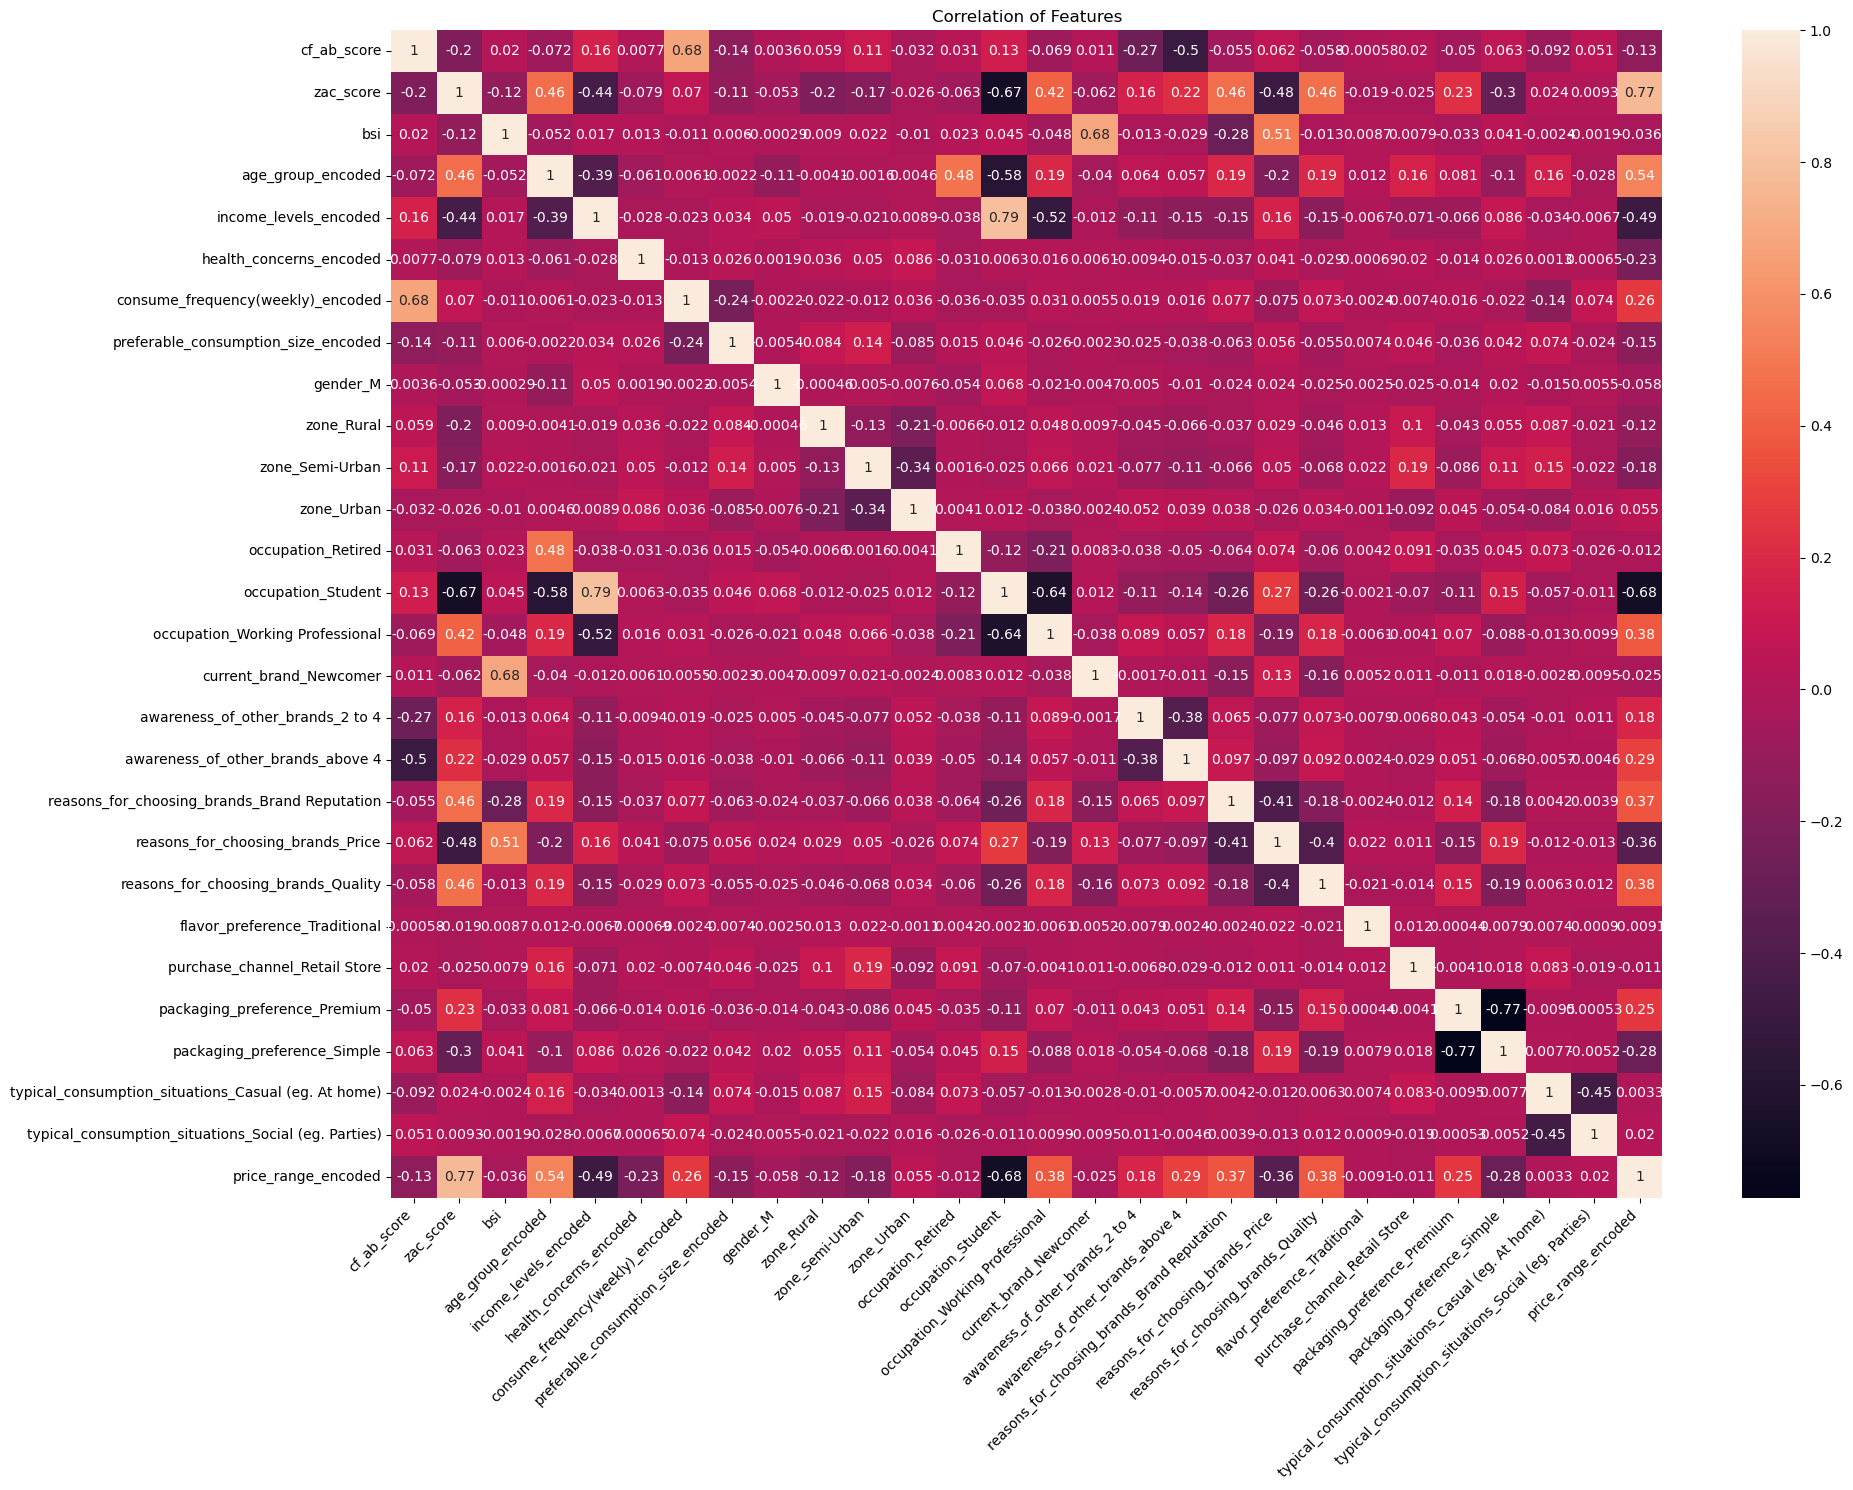

In [809]:
corr_mat = df_enoded.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True)
plt.xticks(rotation= 45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation of Features")
plt.tight_layout()
plt.show()

In [657]:
X = df_enoded.copy()
X = X.drop(columns = "price_range_encoded")
y = df_enoded["price_range_encoded"]

In [658]:
#Let's calculate VIF
def calculate_vif(data):
    data = data.dropna()
    data = data.fillna(data.mean())
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [659]:
calculate_vif(X)

,Column,VIF
0,cf_ab_score,51.179921
1,zac_score,11.276374
2,bsi,5.620715
3,age_group_encoded,4.753122
4,income_levels_encoded,8.644246
5,health_concerns_encoded,2.287429
6,consume_frequency(weekly)_encoded,9.396186
7,preferable_consumption_size_encoded,3.406732
8,gender_M,2.188240
9,zone_Rural,1.546222


In [644]:
X =X.drop(columns= ["cf_ab_score"])

In [645]:
X = X.drop(columns= ["income_levels_encoded","zone_Rural", "zone_Semi-Urban","zone_Urban"])

In [647]:
calculate_vif(X)

,Column,VIF
0,zac_score,7.574548
1,bsi,5.310691
2,age_group_encoded,4.517962
3,health_concerns_encoded,2.164660
4,consume_frequency(weekly)_encoded,2.849872
5,preferable_consumption_size_encoded,3.113424
6,gender_M,2.118416
7,occupation_Retired,1.682503
8,occupation_Student,3.307691
9,occupation_Working Professional,3.591075


In [660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

*****Training the Model*****

In [665]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [713]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train_scaled, y_train)  # Scaled data for Logistic Regression

# Predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Classification Report
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.75      0.77       906
           1       0.74      0.77      0.75      1930
           2       0.75      0.77      0.76      2223
           3       0.90      0.89      0.90      2430

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.80      7489
weighted avg       0.81      0.80      0.80      7489



**GuassianNB**

In [720]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train_scaled, y_train)  # Scaled data for Logistic Regression

# Predictions
y_pred_gnb = model_lr.predict(X_test_scaled)

# Classification Report
gnb_report = classification_report(y_test, y_pred_gnb,output_dict=True)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.81      0.75      0.77       906
           1       0.74      0.77      0.75      1930
           2       0.75      0.77      0.76      2223
           3       0.90      0.89      0.90      2430

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.80      7489
weighted avg       0.81      0.80      0.80      7489



**SVM**

In [693]:
from sklearn.svm import SVC
model_svm = SVC(kernel = "rbf")
model_svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svc = model_svm.predict(X_test_scaled)

In [723]:
svm_report = classification_report(y_test, y_pred_svc, output_dict=True)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       906
           1       0.83      0.84      0.84      1930
           2       0.82      0.85      0.83      2223
           3       0.93      0.91      0.92      2430

    accuracy                           0.86      7489
   macro avg       0.86      0.86      0.86      7489
weighted avg       0.86      0.86      0.86      7489



**Random Forest**

In [695]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test_scaled)

In [725]:
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       906
           1       0.89      0.87      0.88      1930
           2       0.85      0.89      0.87      2223
           3       0.94      0.93      0.93      2430

    accuracy                           0.90      7489
   macro avg       0.90      0.89      0.90      7489
weighted avg       0.90      0.90      0.90      7489



**XGBoost**

In [759]:
from xgboost import XGBClassifier
# Train the XGBoost model
model_xgb = XGBClassifier(max_depth=7, n_estimators=200, learning_rate=.2)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

In [760]:
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       906
           1       0.91      0.89      0.90      1930
           2       0.89      0.91      0.90      2223
           3       0.95      0.95      0.95      2430

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489



**LightGBM**

In [703]:
from lightgbm import LGBMClassifier
# Train the lightgbm model
model_lgb = LGBMClassifier()
model_lgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_lgb = model_lgb.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779


In [729]:
lgb_report = classification_report(y_test, y_pred_lgb, output_dict=True)
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       906
           1       0.91      0.90      0.90      1930
           2       0.89      0.91      0.90      2223
           3       0.96      0.95      0.96      2430

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489



In [746]:
import dagshub
dagshub.init(repo_owner='ishebee', repo_name='survey-ml-flow-dagshub', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Initialized MLflow to track repo "ishebee/survey-ml-flow-dagshub"

Repository ishebee/survey-ml-flow-dagshub initialized!

🏃 View run amusing-ant-789 at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/94c0fcf537064e8e9fc8676450ed6bfb
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [ ]:
import mlflow

In [740]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run(run_name="LR"):
    mlflow.log_metrics({
        "precision_class_0": lr_report['0']['precision'],
        "recall_class_0": lr_report['0']['recall'],
        "f1_score_class_0": lr_report['0']['f1-score'],
        "precision_class_1": lr_report['1']['precision'],
        "recall_class_1": lr_report['1']['recall'],
        "f1_score_class_1": lr_report['1']['f1-score'],
        "accuracy": lr_report['accuracy']
    })
    mlflow.sklearn.log_model(model_lr, "Logistic Regression")

2025/01/29 07:35:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/8a91e5fd6403405bb31a477c56ce64fd
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [741]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run(run_name= "GNB"):
    mlflow.log_metrics({
        "precision_class_0": gnb_report['0']['precision'],
        "recall_class_0": gnb_report['0']['recall'],
        "f1_score_class_0": gnb_report['0']['f1-score'],
        "precision_class_1": gnb_report['1']['precision'],
        "recall_class_1": gnb_report['1']['recall'],
        "f1_score_class_1": gnb_report['1']['f1-score'],
        "accuracy": gnb_report['accuracy']
    })
    mlflow.sklearn.log_model(model_gnb, "GuassianNB")

2025/01/29 07:35:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GNB at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/eb47377150a841b3bd7c40beb6b843bd
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [742]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")


with mlflow.start_run(run_name= "SVM"):
    mlflow.log_metrics({
        "precision_class_0": svm_report['0']['precision'],
        "recall_class_0": svm_report['0']['recall'],
        "f1_score_class_0": svm_report['0']['f1-score'],
        "precision_class_1": svm_report['1']['precision'],
        "recall_class_1": svm_report['1']['recall'],
        "f1_score_class_1": svm_report['1']['f1-score'],
        "accuracy": svm_report['accuracy']
    })
    mlflow.sklearn.log_model(model_svm, "SVM")

2025/01/29 07:35:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/5f8573bc3f554d0d92d814a6fdf5afb4
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [743]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")


with mlflow.start_run(run_name= "RF"):
    mlflow.log_metrics({
        "precision_class_0": rf_report['0']['precision'],
        "recall_class_0": rf_report['0']['recall'],
        "f1_score_class_0": rf_report['0']['f1-score'],
        "precision_class_1": rf_report['1']['precision'],
        "recall_class_1": rf_report['1']['recall'],
        "f1_score_class_1": rf_report['1']['f1-score'],
        "accuracy": rf_report['accuracy']
    })
    mlflow.sklearn.log_model(model_rf, "RF")

2025/01/29 07:36:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/7e8dea8f38644dd78c75031d034d3edf
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [744]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")


with mlflow.start_run(run_name= "XGB"):
    mlflow.log_metrics({
        "precision_class_0": xgb_report['0']['precision'],
        "recall_class_0": xgb_report['0']['recall'],
        "f1_score_class_0": xgb_report['0']['f1-score'],
        "precision_class_1": xgb_report['1']['precision'],
        "recall_class_1": xgb_report['1']['recall'],
        "f1_score_class_1": xgb_report['1']['f1-score'],
        "accuracy": xgb_report['accuracy']
    })
    mlflow.xgboost.log_model(model_xgb, "XGB")

2025/01/29 07:36:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/74bc6cf9f9004d6aa47b1a092fc60cc1
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [745]:
mlflow.set_experiment("Survey Experiment")
mlflow.set_tracking_uri("https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow")
#mlflow.set_tracking_uri("http://127.0.0.1:5000")


with mlflow.start_run(run_name= "LGB"):
    mlflow.log_metrics({
        "precision_class_0": lgb_report['0']['precision'],
        "recall_class_0": lgb_report['0']['recall'],
        "f1_score_class_0": lgb_report['0']['f1-score'],
        "precision_class_1": lgb_report['1']['precision'],
        "recall_class_1": lgb_report['1']['recall'],
        "f1_score_class_1": lgb_report['1']['f1-score'],
        "accuracy": lgb_report['accuracy']
    })
    mlflow.sklearn.log_model(model_lgb, "LGB")

2025/01/29 07:36:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGB at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1/runs/b2d530b6750a4c68a096b79203f2bc96
🧪 View experiment at: https://dagshub.com/ishebee/survey-ml-flow-dagshub.mlflow/#/experiments/1


In [758]:
X_train.columns

Index(['cf_ab_score', 'zac_score', 'bsi', 'age_group_encoded',
       'income_levels_encoded', 'health_concerns_encoded',
       'consume_frequency(weekly)_encoded',
       'preferable_consumption_size_encoded', 'gender_M', 'zone_Rural',
       'zone_Semi-Urban', 'zone_Urban', 'occupation_Retired',
       'occupation_Student', 'occupation_Working Professional',
       'current_brand_Newcomer', 'awareness_of_other_brands_2 to 4',
       'awareness_of_other_brands_above 4',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

In [749]:
import joblib

In [799]:
model_data={
    "model" : model_xgb,
    "features" : X_train.columns
}

joblib.dump(model_data, "model2.joblib")

['model2.joblib']

In [800]:
model_data = joblib.load("model2.joblib")



In [771]:
print(model_data["model"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [772]:
 model_data.keys()

dict_keys(['model', 'features'])

In [774]:
model_data["features"]

Index(['cf_ab_score', 'zac_score', 'bsi', 'age_group_encoded',
       'income_levels_encoded', 'health_concerns_encoded',
       'consume_frequency(weekly)_encoded',
       'preferable_consumption_size_encoded', 'gender_M', 'zone_Rural',
       'zone_Semi-Urban', 'zone_Urban', 'occupation_Retired',
       'occupation_Student', 'occupation_Working Professional',
       'current_brand_Newcomer', 'awareness_of_other_brands_2 to 4',
       'awareness_of_other_brands_above 4',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

In [795]:
model_data["model"].predict(X)

array([1, 3, 3, ..., 2, 2, 2])